In [5]:
import time

import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
from IPython.display import clear_output

from src.cellular_automata.cellular_automaton import CellularAutomaton

%matplotlib inline

In [6]:
def live_plot(state, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    
    graph = seaborn.heatmap(state, vmin=0, vmax=1)
    graph.set(xticklabels=[], yticklabels=[])
    plt.title(title)
    
    plt.show();

## Run simulations and display it live

The initial condition was chosen to lead to a cyclic attractor with periodicity 12

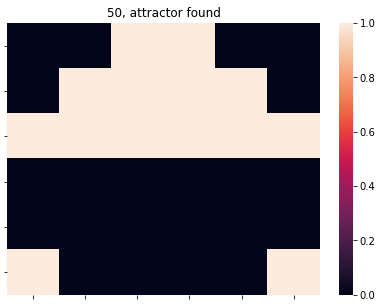

In [7]:
automata = CellularAutomaton(initial_state=numpy.array(
    [[1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 0, 0],
       [1, 1, 0, 1, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 1, 1]]))

found = False
n_generations = 50

for i, state in enumerate(automata.evolve_and_check_for_attractor(n_generations)):
    title = str(i) + ("" if automata.attractor is None else ", attractor found")
    live_plot(state, title=title)

# Display only the attractor

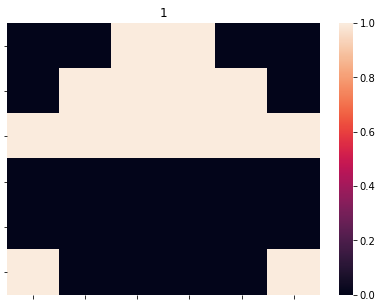

In [8]:
for i in range(50):
    i_in_attractor = i % automata.attractor_period
    live_plot(automata.attractor[i_in_attractor, :, :], title=i_in_attractor)